In [ ]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 




In [ ]:
cd DeOldify

/content/DeOldify/DeOldify/DeOldify


In [ ]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch
import os
import tensorflow as tf
from keras.models import load_model
from PIL import Image, ImageOps
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

!pip install -q jmd_imagescraper

from pathlib import Path
root = Path().cwd()/"images"

from jmd_imagescraper.core import * # dont't worry, it's designed to work with import *

# file paths are returned so if you want to snag a list of downloaded files as you go, do this:

photos = []
photos.extend(duckduckgo_search(root, "picture", "black and white", max_results=20))

if not torch.cuda.is_available():
    print('GPU not available.')

Duckduckgo search: black and white


In [ ]:
!pip install -r colab_requirements.txt

In [ ]:
import fastai
from deoldify.visualize import *

torch.backends.cudnn.benchmark = True

In [ ]:
!mkdir 'models'
!wget https://www.dropbox.com/s/usf7uifrctqw9rl/ColorizeStable_gen.pth?dl=0 -O ./models/ColorizeStable_gen.pth

In [ ]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2021-10-10 13:43:18--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2021-10-10 13:43:18 (29.2 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [ ]:
colorizer = get_image_colorizer(artistic=False)

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential s

  0%|          | 0.00/171M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


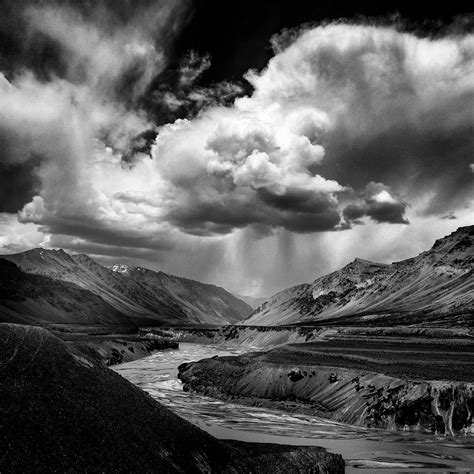

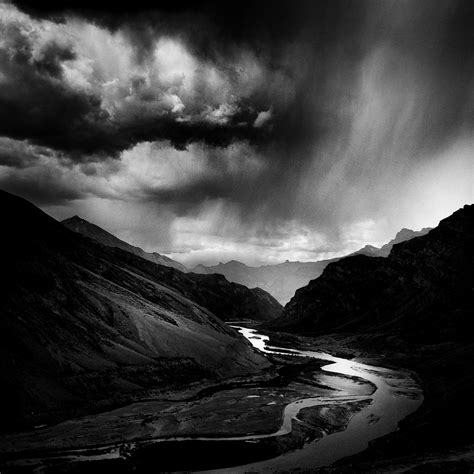

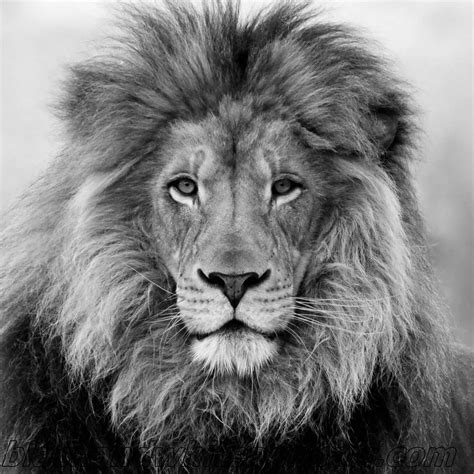

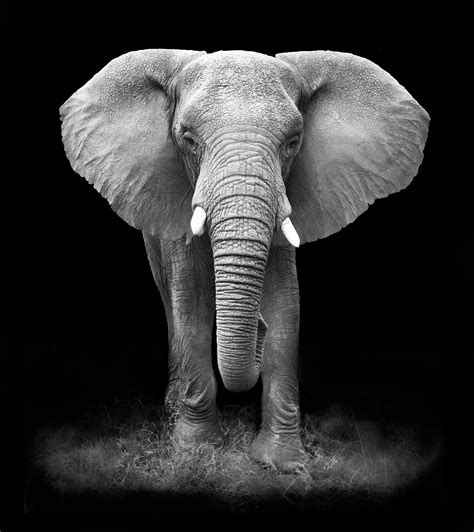

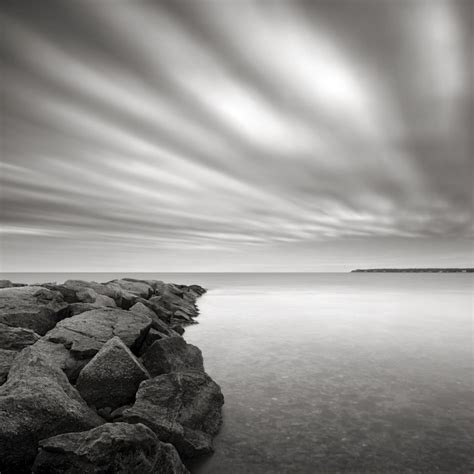

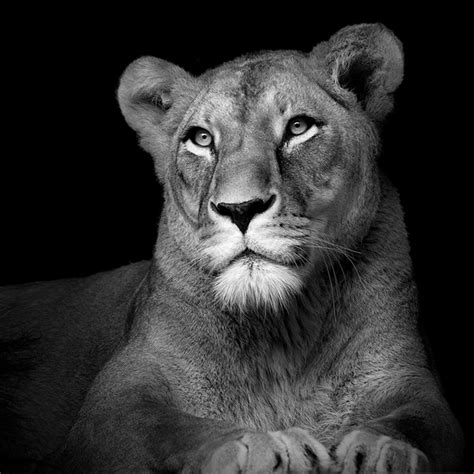

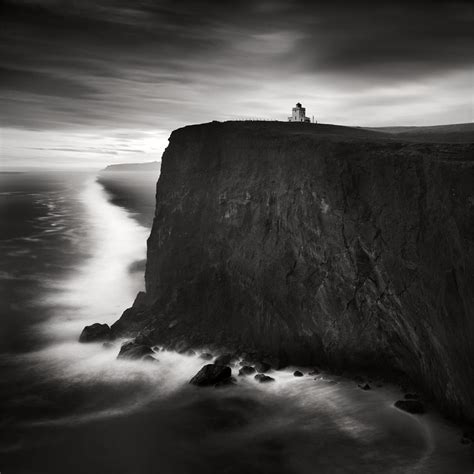

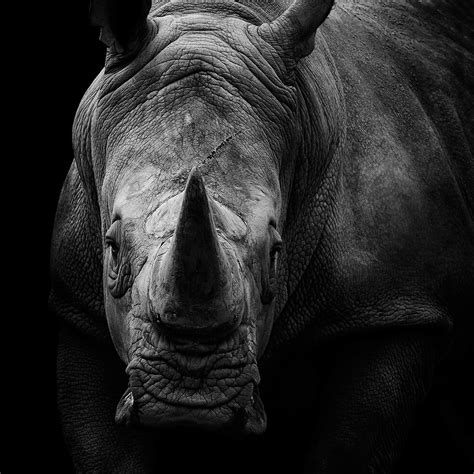

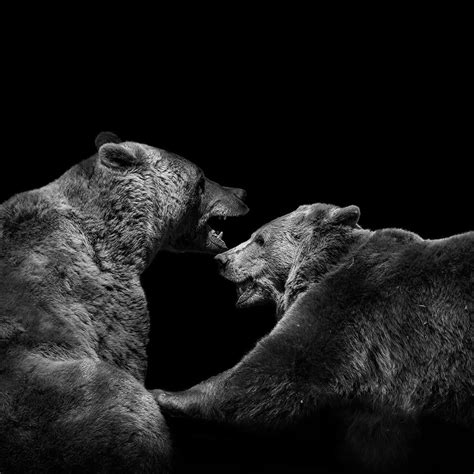

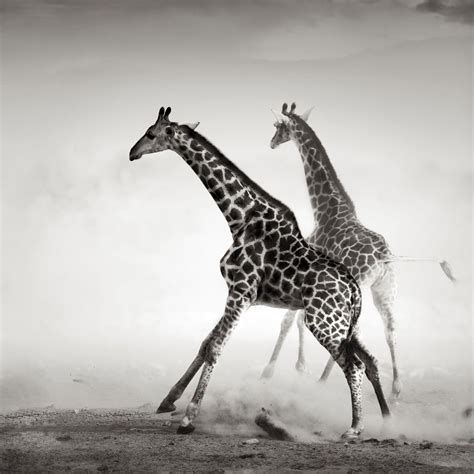

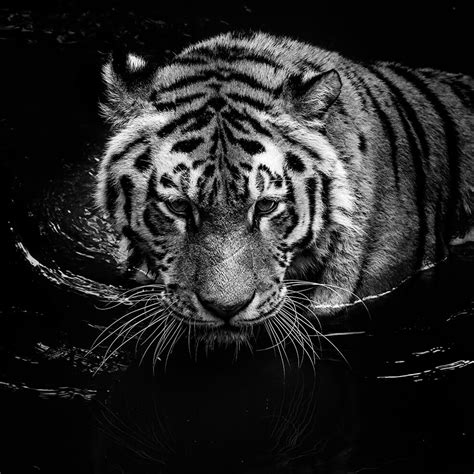

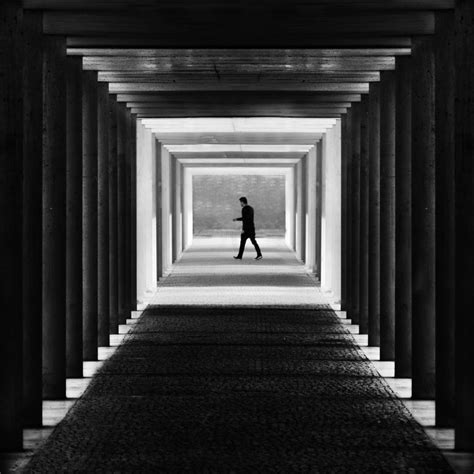

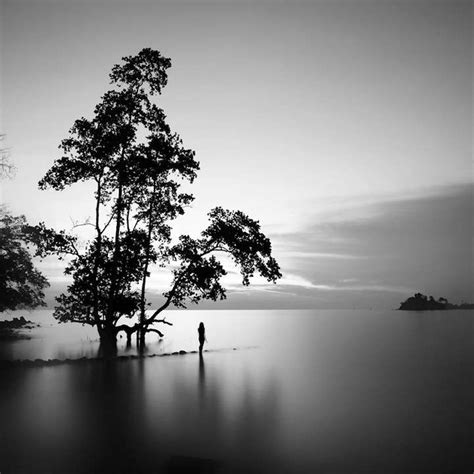

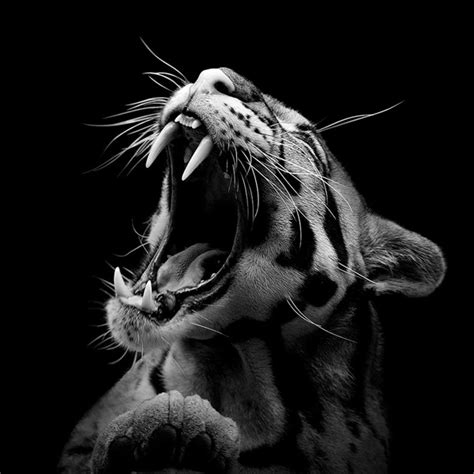

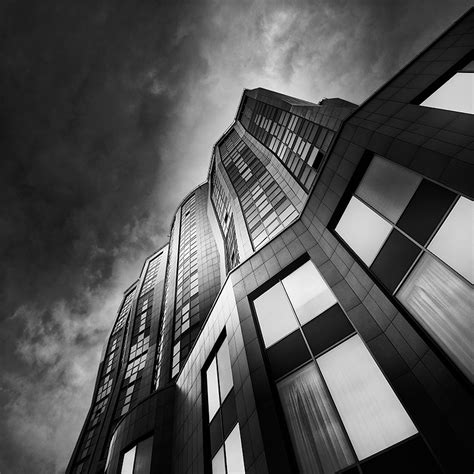

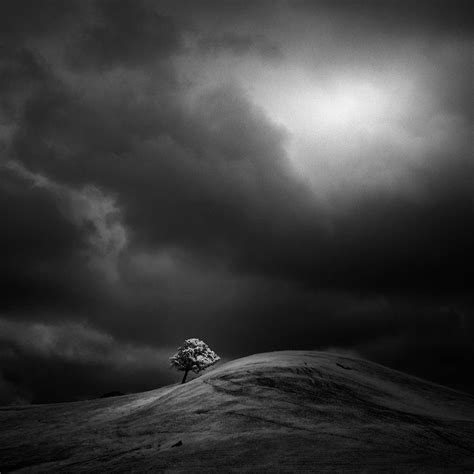

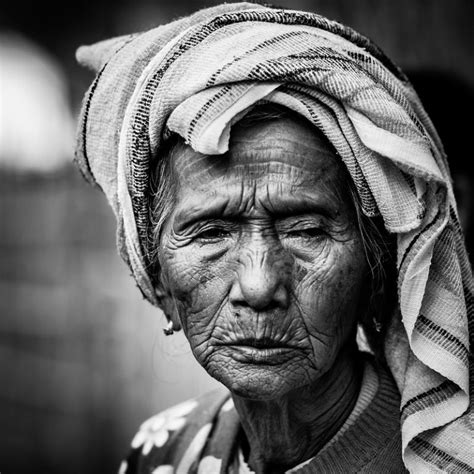

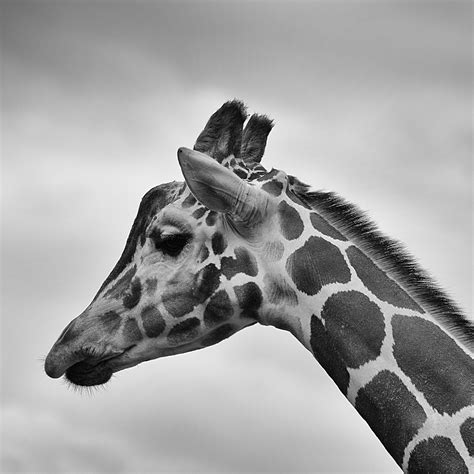

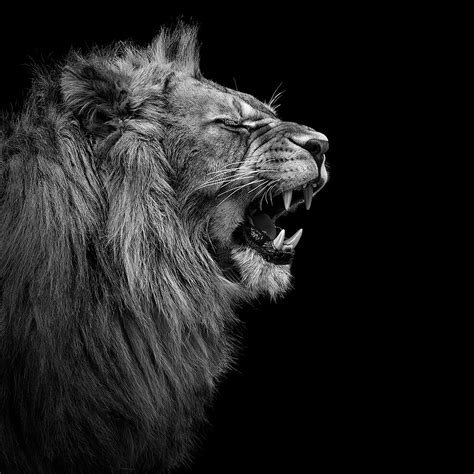

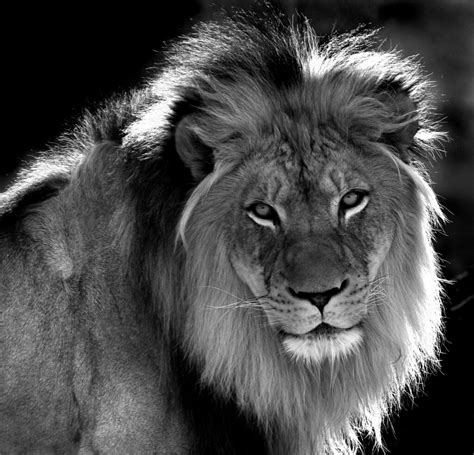

In [ ]:

render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = False #@param {type:"boolean"}

for i in photos:
  if i is not None and i !='':
      image_path = i
      show_image_in_notebook(image_path)
  else:
      print('Provide an image url and try again.')

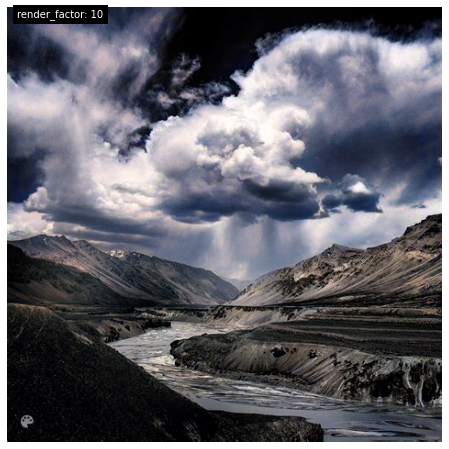

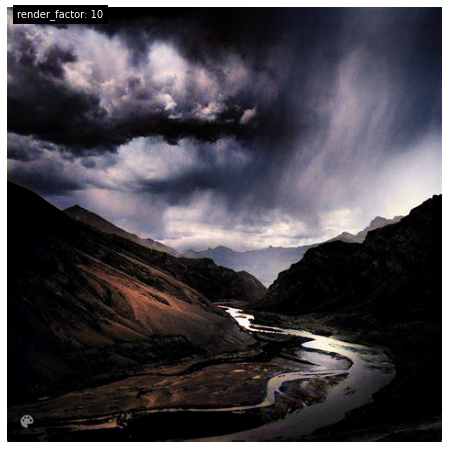

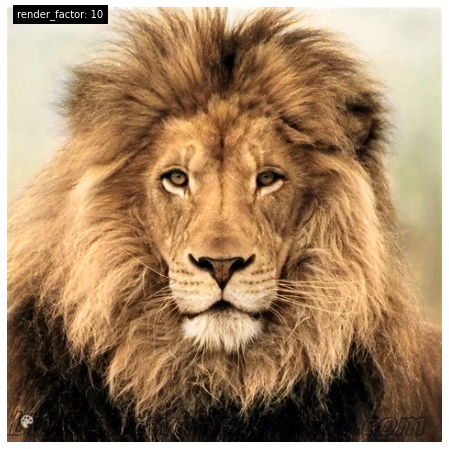

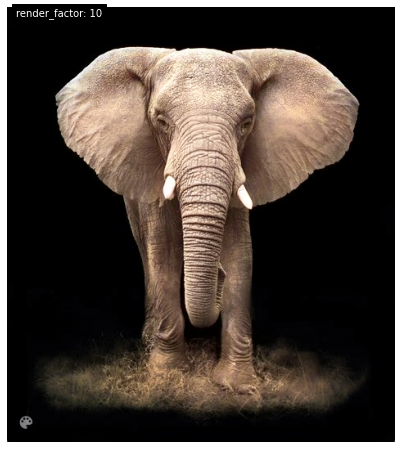

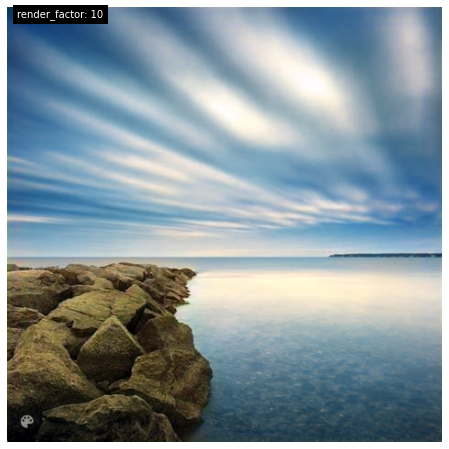

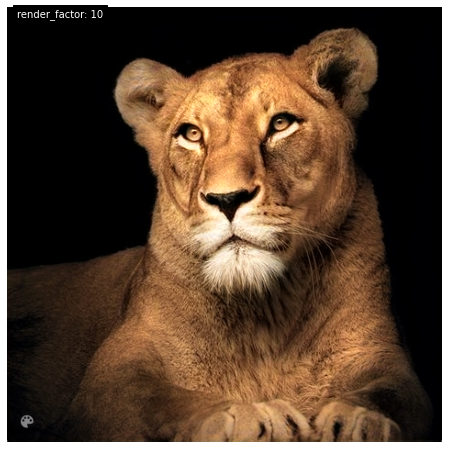

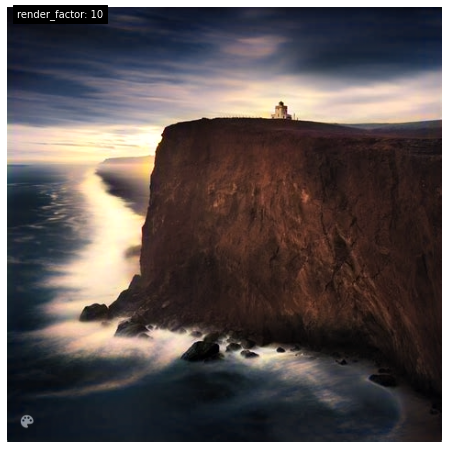

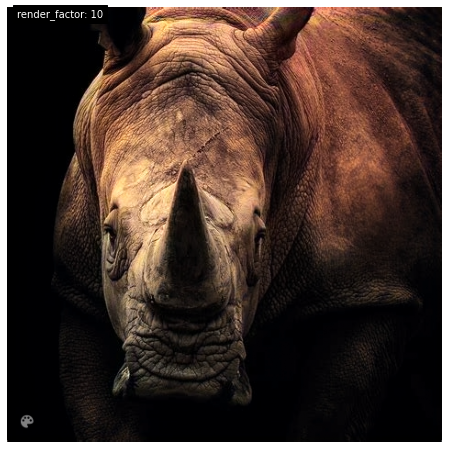

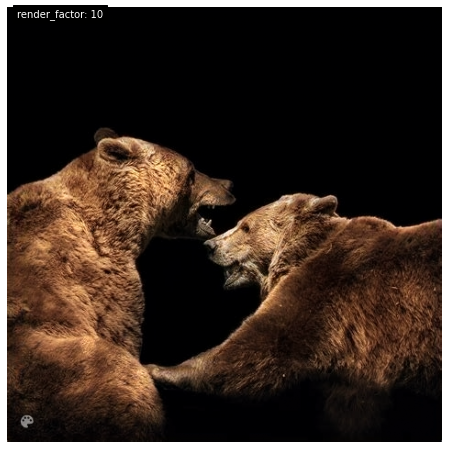

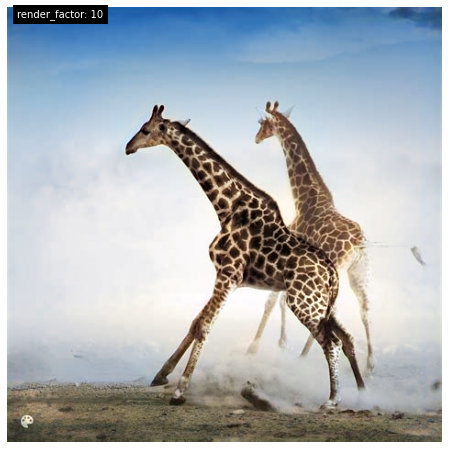

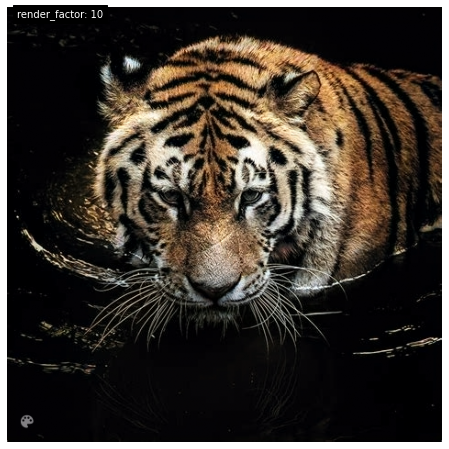

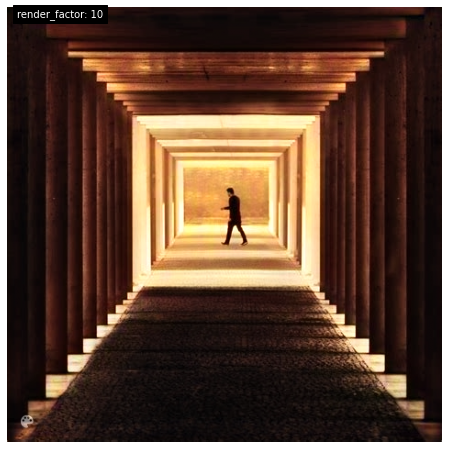

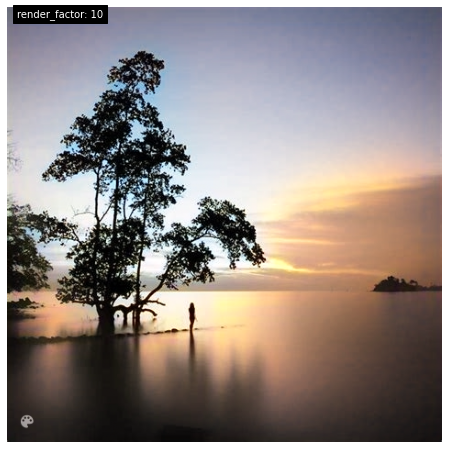

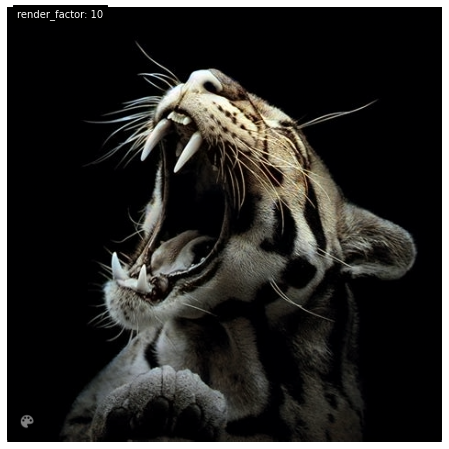

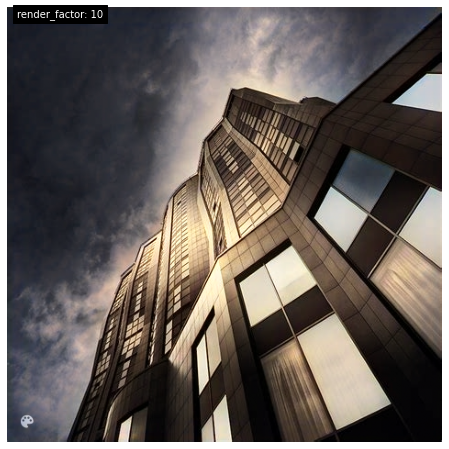

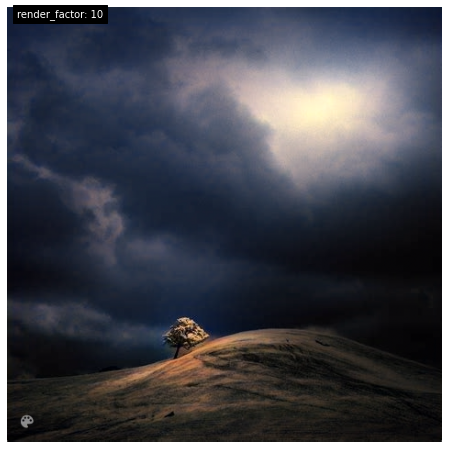

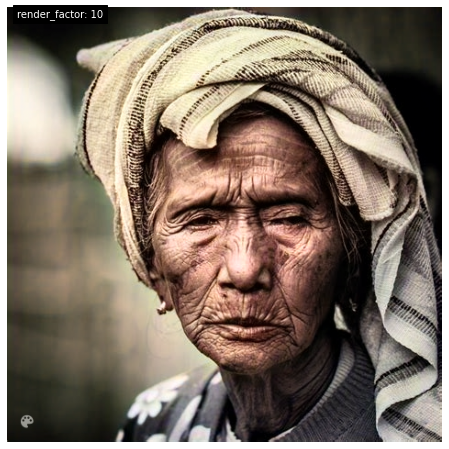

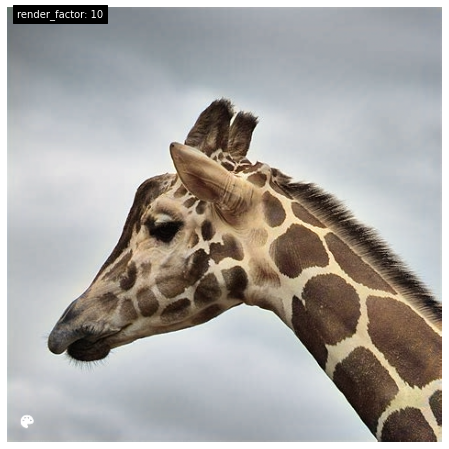

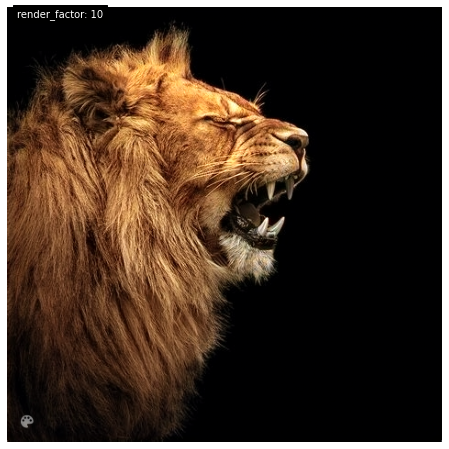

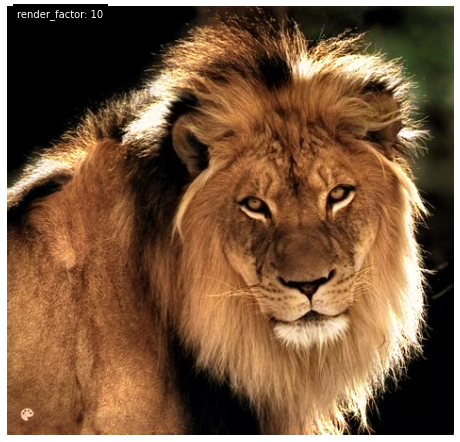

In [ ]:
for i in photos:
  if i is not None and i !='':
      image_path = i
      #for i in range(10,40,2):
      colorizer.plot_transformed_image(image_path, render_factor=10, display_render_factor=True, figsize=(8,8))
      